In [1]:
import numpy as np 
import pandas as pd 
import sklearn
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import seaborn as sns
from IPython.display import display
pd.options.mode.chained_assignment = None
import matplotlib
matplotlib.style.use('ggplot')

from google.colab import drive
drive.mount('/content/drive')
tweets = pd.read_csv('/content/drive/My Drive/dataset1.csv', nrows=500,encoding = "ISO-8859-1")
!pip install '/content/drive/My Drive/lib-0.1.0-py3-none-any.whl'
!pip install '/content/drive/My Drive/tablib-0.1.0-py3-none-any.whl'
!pip install vadersentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
display(tweets.head(3))

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./drive/My Drive/lib-0.1.0-py3-none-any.whl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./drive/My Drive/tablib-0.1.0-py3-none-any.whl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


,Unnamed: 0.1,Unnamed: 0,the_special_one,created_at,tweet_id,text,tweet_length,Positive,Negative,Neutral,Compound,Sentiment
0,0,0,thedogist,2022-11-28 19:09:19,1597306661596991489,"Dobby, American Bully mix (2 y/o), Pier 84, Ne...",277,0.187,0.056,0.757,0.8126,Positive
1,1,1,thedogist,2022-11-27 16:07:07,1596898423701405698,"Marshall, Boxer (5 m/o), Carroll &amp; 8th Ave...",208,0.000,0.073,0.927,-0.3649,Negative
2,2,2,thedogist,2022-11-26 19:53:27,1596592994861326336,"Leo, Bernedoodle (3 m/o), Bleecker &amp; Perry...",250,0.078,0.000,0.922,0.5719,Positive


In [2]:
import re

tweets['text_new'] = ''
tweets['tweetos'] = '' 


for i in range(len(tweets['text'][:500])):
    try:
        tweets['tweetos'][i] = tweets['text'].str.split(':')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'


for i in range(len(tweets['text'][:500])):
    if tweets['tweetos'].str.contains('RT @')[i]  == False:
        tweets['tweetos'][i] = 'other'


for i in range(len(tweets['text'][:500])):
    m = re.search('(?<=:)(.*)', tweets['text'][i])
    if tweets['text'].str.contains('RT @')[i]  == True:
        try:
            tweets['text_new'][i]=m.group(0)
        except AttributeError:
            tweets['text_new'][i]=tweets['text'][i] 
    else:       
        tweets['text_new'][i] =  tweets['text'][i]       

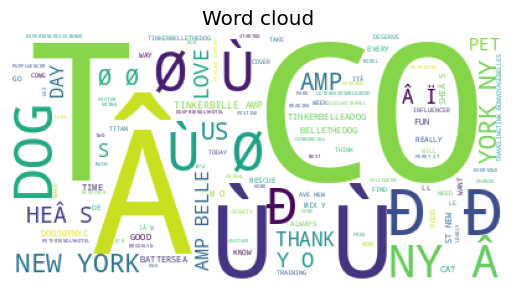

In [3]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_by_province(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("Happy")
    stopwords.add("Soft")
   
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets['text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Word cloud")

wordcloud_by_province(tweets)  

In [4]:
print(tweets['the_special_one'].describe())

count           102
unique            6
top       thedogist
freq             18
Name: the_special_one, dtype: object


In [5]:
tweets['nb_words'] = 0
for i in range(len(tweets['text'])):
    tweets['nb_words'][i] = len(tweets['text'][i].split(' '))

In [6]:
tweets['hour'] = pd.DatetimeIndex(tweets['created_at']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created_at']).date
tweets['minute'] = pd.DatetimeIndex(tweets['created_at']).minute

In [7]:
tweets_hour = tweets.groupby(['hour'])['tweet_length'].sum()
tweets_minute = tweets.groupby(['minute'])['tweet_length'].sum()
tweets['text_len'] = tweets['text'].str.len()
tweets_avgtxt_hour = tweets.groupby(['hour'])['text_len'].mean()
tweets_avgwrd_hour = tweets.groupby(['hour'])['nb_words'].mean()

In [8]:
tweets['the_special_one'].unique()

array(['thedogist', 'TheCattoLovers', 'TINKERBELLEadog', 'Battersea_',
       'dog_feelings', 'CuteSpartacus'], dtype=object)

In [9]:
t=tweets['the_special_one'].value_counts()
t

thedogist          18
TINKERBELLEadog    18
Battersea_         18
dog_feelings       18
CuteSpartacus      18
TheCattoLovers     12
Name: the_special_one, dtype: int64

<Axes: >

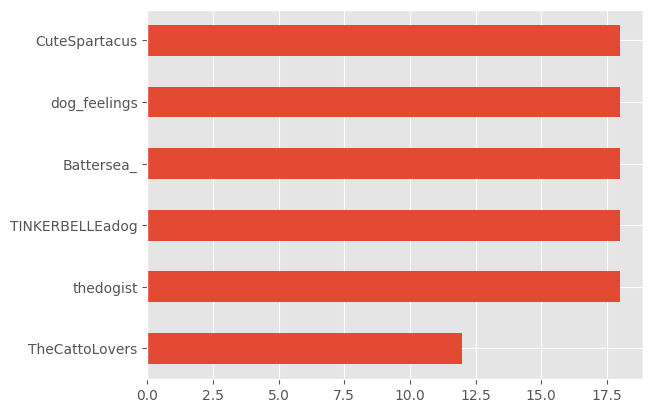

In [10]:
t.sort_values().plot(kind = 'barh')

In [11]:
tweets_hour

hour
0      256
1      223
3      947
7       49
8      426
9      860
10     301
11     221
12     385
13     208
14     988
15    1435
16    1223
17    1860
18    2261
19    1551
20    1069
21     727
22     518
23     492
Name: tweet_length, dtype: int64

Text(0.5, 1.0, 'Maximum tweet length')

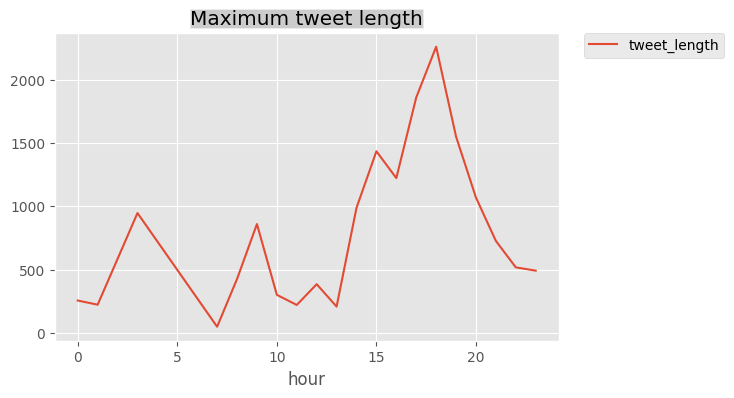

In [12]:
import seaborn as sns
tweets_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Maximum tweet length', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5, 1.0, 'The number of retweet by minute')

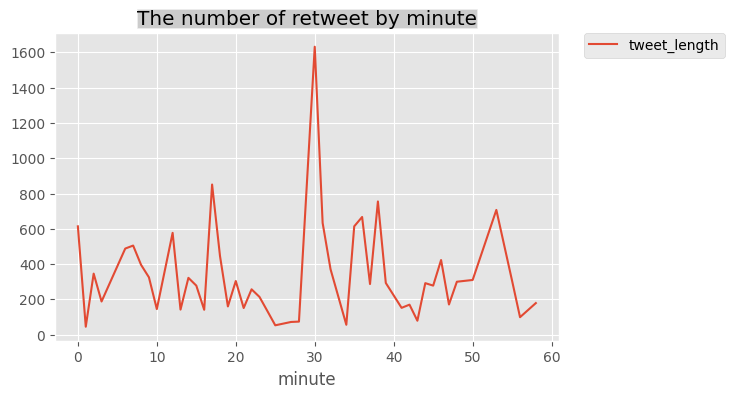

In [13]:
tweets_minute.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of retweet by minute', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5, 1.0, 'The Average of lenght by hour')

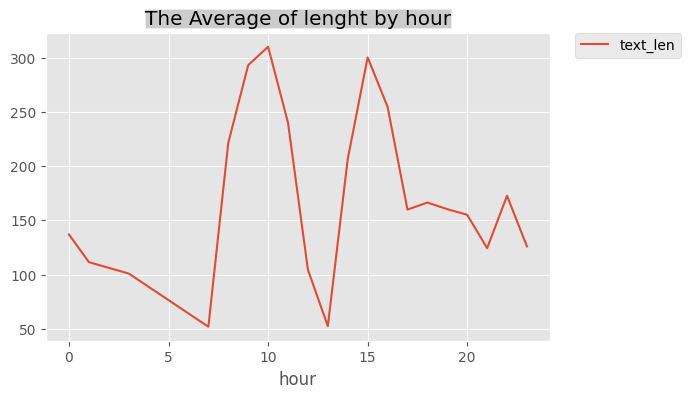

In [14]:
tweets_avgtxt_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The Average of lenght by hour', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5, 1.0, 'The Average number of words by hour')

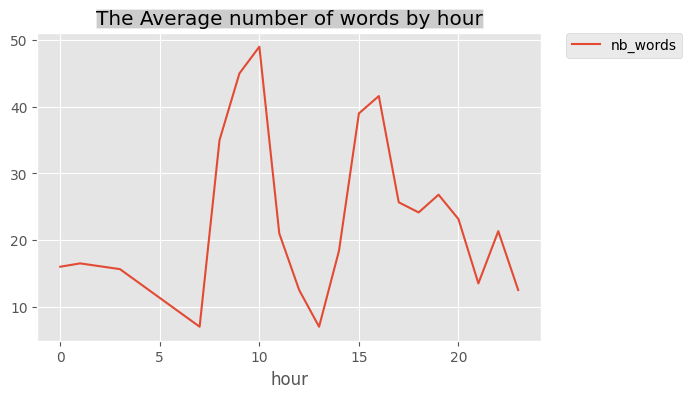

In [15]:
tweets_avgwrd_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The Average number of words by hour', bbox={'facecolor':'0.8', 'pad':0})

In [16]:
def get_stop_words(s, n):
	
	from collections import Counter
	l = get_corpus(s)
	l = [x for x in Counter(l).most_common(n)]
	return l

def get_corpus(s):
	
	l = []
	s.map(lambda x: l.extend(x))
	return l


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


from nltk.stem import WordNetLemmatizer

tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets['text_new']]       

vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_lem'].str.upper())
print(X.shape)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


(102, 6)


In [18]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)

In [19]:
km.fit(X)
terms = vectorizer.get_feature_names_out()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(5):
    print("cluster %d:" %i, end='')
    for ind in order_centroids[i,:10]:
        print('%s' % terms[ind], end='')
    print()    

cluster 0:newnyyorkampdogsbelle
cluster 1:yorknynewdogsbelleamp
cluster 2:belleampdogsyorknynew
cluster 3:dogsyorknynewbelleamp
cluster 4:dogsyorknynewbelleamp


In [20]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pos = pca.fit_transform(dist)
xs, ys = pos[:,0], pos[:,1]

In [22]:

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}#, 5: '#8A2BE2', 6: '#E9967A'}

cluster_names = {0: 'cluster 1', 
                 1: 'cluster 2', 
                 2: 'cluster 3', 
                 3: 'cluster 4', 
                 4: 'cluster 5'}
                 #5: 'cluster 6',
                 #6: 'cluster 7'}
clusters = km.labels_.tolist()

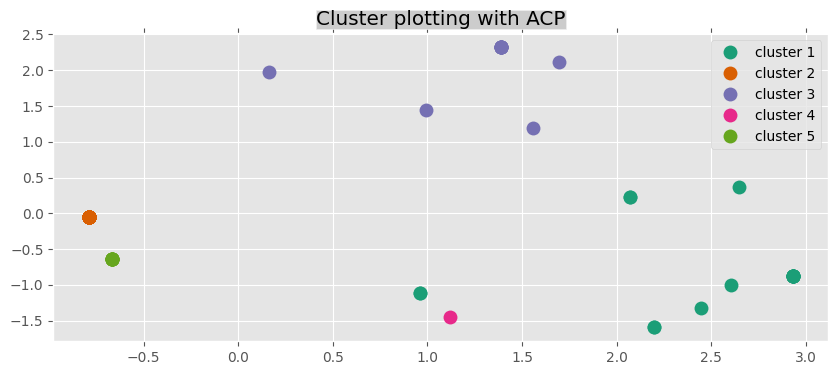

In [23]:

%matplotlib inline 

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title='')) 


groups = df.groupby('label')



fig, ax = plt.subplots(figsize=(10, 4)) # set size
ax.margins(0.05) 


for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, 
            label=cluster_names[name], color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',     
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',        
        which='both',     
        left='off',      
        top='off',        
        labelleft='off')
    
ax.legend(numpoints=1)  
plt.title('Cluster plotting with ACP', bbox={'facecolor':'0.8', 'pad':0})

for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['title'], size=5)  

    
    
plt.show()

In [24]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Unnamed: 0.1,Unnamed: 0,the_special_one,created_at,tweet_id,text,tweet_length,Positive,Negative,Neutral,...,hour,date,minute,text_len,text_lem,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,0,0,thedogist,2022-11-28 19:09:19,1597306661596991489,"Dobby, American Bully mix (2 y/o), Pier 84, Ne...",277,0.187,0.056,0.757,...,19,2022-11-28,9,291,Dobby American Bully mix y o Pier Ne...,0.9022,0.711,0.053,0.236,POSITIVE
1,1,1,thedogist,2022-11-27 16:07:07,1596898423701405698,"Marshall, Boxer (5 m/o), Carroll &amp; 8th Ave...",208,0.000,0.073,0.927,...,16,2022-11-27,7,222,Marshall Boxer m o Carroll amp th Ave...,0.2389,0.837,0.067,0.096,POSITIVE
2,2,2,thedogist,2022-11-26 19:53:27,1596592994861326336,"Leo, Bernedoodle (3 m/o), Bleecker &amp; Perry...",250,0.078,0.000,0.922,...,19,2022-11-26,53,256,Leo Bernedoodle m o Bleecker amp Perry...,0.5719,0.922,0.000,0.078,POSITIVE
3,3,3,thedogist,2022-11-24 15:35:16,1595803244130967553,"Nestle, Labrador Retriever (14 m/o), Washingto...",283,0.000,0.059,0.941,...,15,2022-11-24,35,293,Nestle Labrador Retriever m o Washingto...,-0.4019,0.943,0.057,0.000,NEGATIVE
4,4,4,thedogist,2022-11-23 17:45:56,1595473737079562241,"Sticky, Labrador Retriever mix (6 m/o), 84th &...",278,0.129,0.040,0.832,...,17,2022-11-23,45,290,Sticky Labrador Retriever mix m o th ...,0.6697,0.835,0.039,0.126,POSITIVE


In [25]:
from  sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from lib.utils import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


tweets_num_mod = tweets[tweets.select_dtypes(exclude=['object']).columns.values]


In [26]:

X,y=extract_feature(tweets_num_mod)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
ac=[]

In [27]:
from keras import layers
from keras.models import Sequential

model = Sequential()
model.add(layers.Dense(20, input_dim=4, activation='relu'))
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam')
model.summary()
classifier_nn = model.fit(X_train,y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=15)
ac.append(accuracy_score(classifier_nn,y_test,sample_weight=0.2)*100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1024)              11264     
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                        

In [28]:
from sklearn.svm import SVC
clf=SVC(gamma='auto')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
ac.append(accuracy_score(y_pred,y_test)*100)

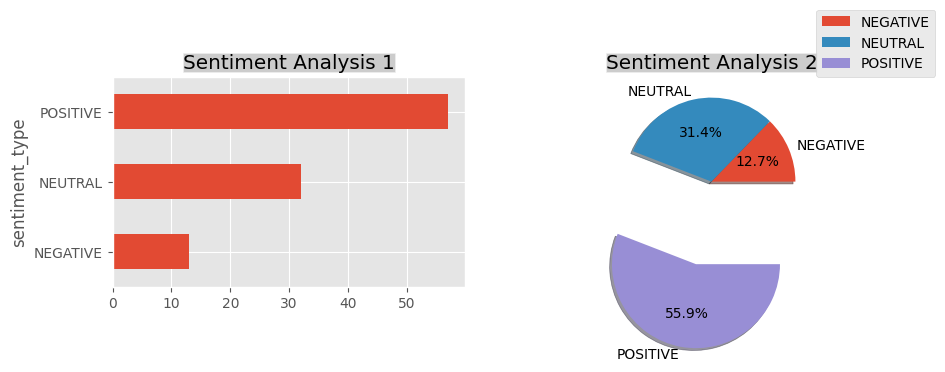

In [29]:
import matplotlib
matplotlib.style.use('ggplot')

tweets_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentiment.rename("",inplace=True)
explode = (0, 0, 1.0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(10, 6))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(10, 6),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

In [30]:
tweets['count'] = 1
tweets_filtered = tweets[['hour', 'sentiment_type', 'count']]
pivot_tweets = tweets_filtered.pivot_table(tweets_filtered, index=["sentiment_type", "hour"], aggfunc=np.sum)
print(pivot_tweets.head())

                     count
sentiment_type hour       
NEGATIVE       9         1
               15        2
               16        2
               17        4
               18        1


Text(0.5, 1.0, 'Evolution of sentiments by hour')

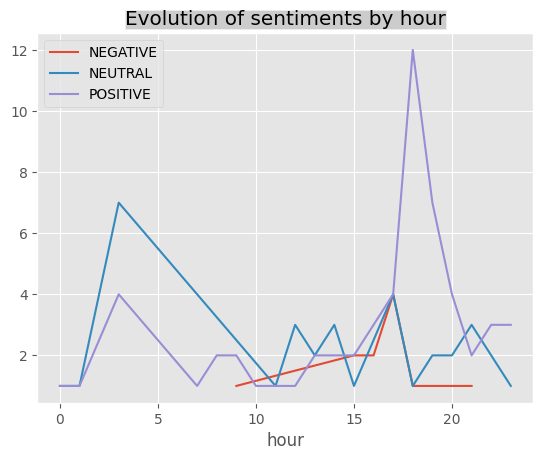

In [31]:
sentiment_type = pivot_tweets.index.get_level_values(0).unique()

plt.setp(ax, xticks=list(range(0,24)))

for sentiment_type in sentiment_type:
    split = pivot_tweets.xs(sentiment_type)
    split["count"].plot( legend=True, label='' + str(sentiment_type))
plt.title('Evolution of sentiments by hour', bbox={'facecolor':'0.8', 'pad':0})    

In [32]:

def predict(s):
    model=SentimentIntensityAnalyzer()
    scores=model.polarity_scores(s)
    c=comp(scores)
    return c
def comp(scores):
    if(scores['neg']>scores['pos'] and scores['neg']>scores['neu'] ):
        return "Predicted as depressed or sad tweet"

    elif(scores['pos']>scores['neg'] and scores['pos']>scores['neu'] ):
        return "Predicted as happy tweet"
    else:
        return "Neutral tweet"

the accuracy of CNN is 98.5 and SVM is 88.6


<ipython-input-35-d9b8693c8d07>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


,Agorithms,accuracy
0,CNN,98.5
1,SVM,88.6


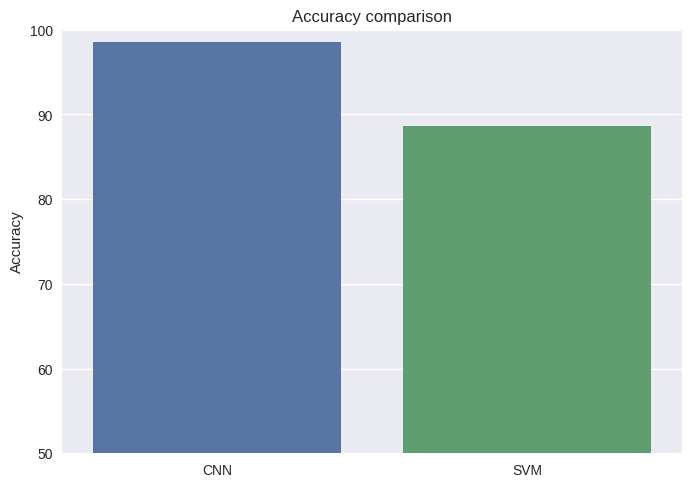

In [35]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('seaborn')
x=['CNN','SVM']
 
ax=sns.barplot(x=x,y=ac)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')

print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)
import pandas as pd
data={'Agorithms':x,
     "accuracy":ac}
df=pd.DataFrame(data)
df.head()

In [34]:
predict("i am happy and enjoying day with my dog")

'Predicted as happy tweet'